# Week2授業前課題4（任意課題）
## ダーツ投げ問題
*＊本課題は任意課題です。提出は必須ではありません。*

ここでは、6つあるダーツのまとの中から一つ選びダーツを投げるシミュレーションを作成します。シミューレーションと言っても動画ではなく、以下のようなものを作成します。

(画像略)

実装する上での前提条件を以下に示します。


- 複数のダーツのまとは、間を空けずに横一列に並んでいるとします。
- ある番号のまとに狙ったダーツは、他のまとには行かないとします。

実装するフローは以下になります。


- ダーツのまとを選びます。（ここではサイコロを振り、出た目の番号を狙うまとの番号とします。）
- サイコロで出た番号のまとを選び、ダーツを投げます。（ここではダーツが刺さる場所は正規分布に従うとします。）
- ダーツが刺さった場所を記録します。（x座標、y座標だけではなく、どの番号のまとに向かって投げたかも記録します。）
- 1~3を指定回数（ダーツの投げる回数）だけ繰り返します。（指定回数は任意です。）
- 各番号のダーツが刺さった場所をプロットします。（ダーツのまとが6個なら、6個のダーツのまとが横に等間隔で並んでいるイメージです。）

これらのフローを以下の問題を通じて一つ一つ実装していきましょう。

# 問題1
## ダーツの的を選ぶ
ダーツのまとを選ぶためにサイコロを実装しましょう。

In [102]:
import numpy as np

def random_dice():
    dice_list = list(range(1, 7))
    return np.random.choice(dice_list)

print(random_dice())

6


# 問題2
## ダーツを投げて、刺さった場所を記録する
ダーツの刺さった場所(x座標、y座標)を正規分布から値を発生させることで表現しましょう。 **正規分布のx方向の「中心」は問題1で出たサイコロの番号、「標準偏差」は0.1としてください。 ** 刺さった場所（座標）は、配列で保持するようにしてください。

In [103]:
def throw_darts():
    roll = random_dice()
    mean = [roll, 0]
    # x, yは独立であるため共分散は0
    cov = [[0, 0.01], [0.01, 0]]
    return roll, np.random.multivariate_normal(mean, cov)

print(throw_darts())

(2, array([1.98506294, 0.02865972]))


# 問題3
## ダーツをたくさん投げて、まとの番号と紐付けた状態で記録する
ダーツを1000回投げて、全てのダーツの刺さった位置をディクショナリに格納してください。ディクショナリのkeyはダーツのまとの番号になります。

In [104]:
dict_throws = {
    1:[],
    2:[],
    3:[],
    4:[],
    5:[],
    6:[]
}

for _ in range(1000):
    throwing = throw_darts()
    dict_throws.get(throwing[0]).append(throwing[1])

print(dict_throws)

8]), array([3.04161551, 0.07977451]), array([3.05928637, 0.04206735]), array([ 3.04239935, -0.09089094]), array([2.91626067, 0.04455182]), array([2.9220091 , 0.06239102]), array([3.08808194, 0.05374848]), array([3.06323705, 0.02474655]), array([ 2.85470078, -0.12605017]), array([3.1667777 , 0.17571544]), array([ 3.06099938, -0.02124256]), array([2.82639794e+00, 2.76136472e-03]), array([ 3.09485937, -0.03177495]), array([ 2.9795948, -0.1943386]), array([ 3.08381796, -0.16938722]), array([ 2.90467693, -0.08399296]), array([ 2.89871951, -0.18830418]), array([2.95723945, 0.02175046]), array([3.00429936, 0.03087864]), array([ 3.01523132, -0.14473041]), array([ 3.10316923, -0.11003357]), array([ 3.07146934, -0.04610122]), array([ 2.91767519, -0.01910969]), array([3.03093596, 0.03385002]), array([ 3.02710784, -0.19100235]), array([2.95487004, 0.07144612]), array([2.96127799, 0.18169718]), array([ 2.86114905, -0.13466377]), array([ 3.09763239e+00, -2.88813462e-03]), array([ 2.8520101 , -0.2144

# 問題4
## ダーツのまとと刺さった位置を描画する
問題3で作成したディクショナリからkeyごとに値を取り出し、まとごとに刺さった場所を描画してみましょう。ダーツのまとを表現するためここではmatplotlibのpatchesクラスを用いてください。

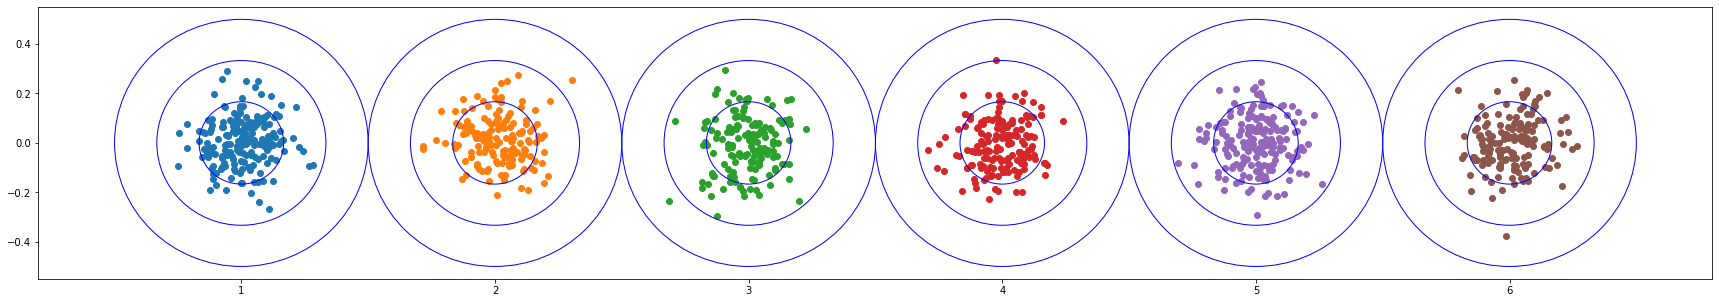

In [105]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
fig = plt.figure(figsize=(30, 5))
ax = plt.axes()

for i in range(1, 7):
    circle_1 = patches.Circle(xy=(i, 0), radius=1/2,
                fc='None', ec='blue')
    circle_2 = patches.Circle(xy=(i, 0), radius=1/2*2/3,
                fc='None', ec='blue')
    circle_3 = patches.Circle(xy=(i, 0), radius=1/2*1/3,
                fc='None', ec='blue')
    ax.add_patch(circle_1)
    ax.add_patch(circle_2)
    ax.add_patch(circle_3)
    plt.scatter([x[0] for x in dict_throws.get(i)], 
                [y[1] for y in dict_throws.get(i)])
 
plt.show()